<div class="alert alert-block alert-success">

![logo](https://textnets.readthedocs.io/en/stable/_static/textnets-logo.svg)

📜 Need help using `textnets`? **Consult the [documentation](https://textnets.readthedocs.io).**

💡 Found a problem or got an idea for how to improve `textnets`? **File [an issue](https://github.com/jboynyc/textnets/issues).**

🙋🏽‍♀️ Still feeling lost? **Contact [me](https://www.jboy.space/contact.html).**

</div>

Start by importing `textnets`.

In [1]:
import textnets as tn

In [2]:
tn

textnets,Version: 0.8.0


For reproducibility of results, it is advisable to document (or fix) the initial seed for the pseudorandom number generator. The seed is set at import time and is contained in the `params` object, which also holds a few other global parameters.

In [3]:
tn.params

Parameter              Value         
--------------------   --------------
seed                   3125          
autodownload           False         
ffca_cutoff            0.3           
lang                   en_core_web_sm
resolution_parameter   0.1           
tuning_parameter       0.5

You can also set a random seed and change the other global parameters.

In [4]:
tn.params["seed"] = 42

## Step 1: Prepare Corpus

There are many ways to prepare your collection of documents, or corpus, for analysis using `textnets`. Consult the documentation for details on how to read your texts from CSV files, SQL databases, or data frames.

Here in Binder, you can upload your data in CSV format and then use `Corpus.from_csv` to read it.

`textnets` supports many languages which you can specify using ISO short codes. The required language models are already installed in this environment.

In [5]:
corpus = tn.Corpus(tn.examples.moon_landing, lang="en")

In [6]:
corpus

<Corpus with 7 documents using language model 'en_core_web_sm'>

## Step 2: Create Network

In [7]:
t = tn.Textnet(corpus.tokenized(), min_docs=1)

In [8]:
t

Textnet,Docs: 7,Terms: 22,Edges: 36


## Step 3: Visualize & Analyze

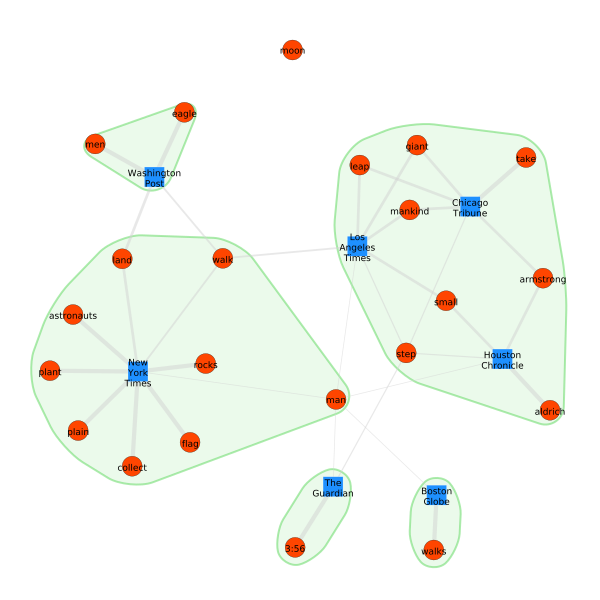

In [9]:
t.plot(label_nodes=True,
       show_clusters=True,
       edge_width=[5*w for w in t.edges["weight"]],
       edge_opacity=0.5)

Clusters within the one-mode term-to-term projection can be interpreted as indicating latent themes, similar to the "topics" identified by topic modeling algorithms.

In [10]:
terms = t.project(node_type="term", connected=True)

In [11]:
terms.top_cluster_nodes()

cluster
0    leap, giant, mankind, armstrong, small, step, ...
1    astronauts, collect, flag, plant, rocks, plain...
2                                     walk, men, eagle
Name: nodes, dtype: object

## Step 4: Save Networks and Plots

Often you will want to use the networks created by `textnets` with other software packages, such as Gephi. You can output the underlying network in a variety of formats.

In [12]:
t.save_graph("moon_landing.gml")

In [13]:
!ls *.gml

moon_landing.gml


You can also save the plots produced by `textnets` in a variety of image formats by simply passing `target=<filename>"` to `.plot()`. Supported formats include PNG, SVG, and EPS. 

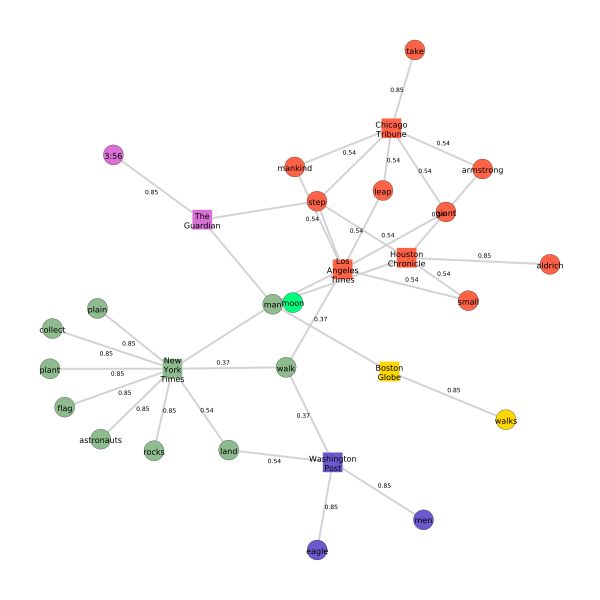

In [14]:
t.plot(label_nodes=True, 
       node_label_size=8,
       label_edges=True,
       edge_label_size=6,
       edge_label_filter=lambda e: e["weight"] > 0.3,
       color_clusters=True, 
       kamada_kawai_layout=True,
       target="moon_landing.eps")

In [15]:
!ls *.eps

moon_landing.eps
